In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings("ignore")

In [2]:
conn= sqlite3.connect("Inventoryy.db")

In [3]:
df=pd.read_sql("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [4]:
df.to_csv("vendor_sales_summary.csv",index=False)

## Again EDA on final dataset

In [ ]:
# summary statistics
df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [6]:
# distribution plots for numerical columns
numerical_cols= df.select_dtypes(include=np.number).columns ##This line automatically finds all the numeric columns in your DataFrame df
numerical_cols  #Because later in your for loop, you're plotting histograms for each numerical column only — not strings, dates, etc.#Histograms are used to understand the distribution of numerical data, so we filter out only those columns that contain numbers.

Index(['VendorNumber', 'Brand', 'PurchasePrice', 'Volume', 'ActualPrice',
       'TotalPurchaseQuantity', 'TotalPurchaseDollars', 'TotalSalesQuantity',
       'TotalSalesDollars', 'TotalSalesPrice', 'TotalExciseTax',
       'freight_cost', 'GrossProfit', 'ProfitMargin', 'StockTurnover',
       'SalesToPurchaseRatio'],
      dtype='object')

In [6]:

for i ,col in enumerate(numerical_cols):
    print(i,col)
   

0 VendorNumber
1 Brand
2 PurchasePrice
3 Volume
4 ActualPrice
5 TotalPurchaseQuantity
6 TotalPurchaseDollars
7 TotalSalesQuantity
8 TotalSalesDollars
9 TotalSalesPrice
10 TotalExciseTax
11 freight_cost
12 GrossProfit
13 ProfitMargin
14 StockTurnover
15 SalesToPurchaseRatio


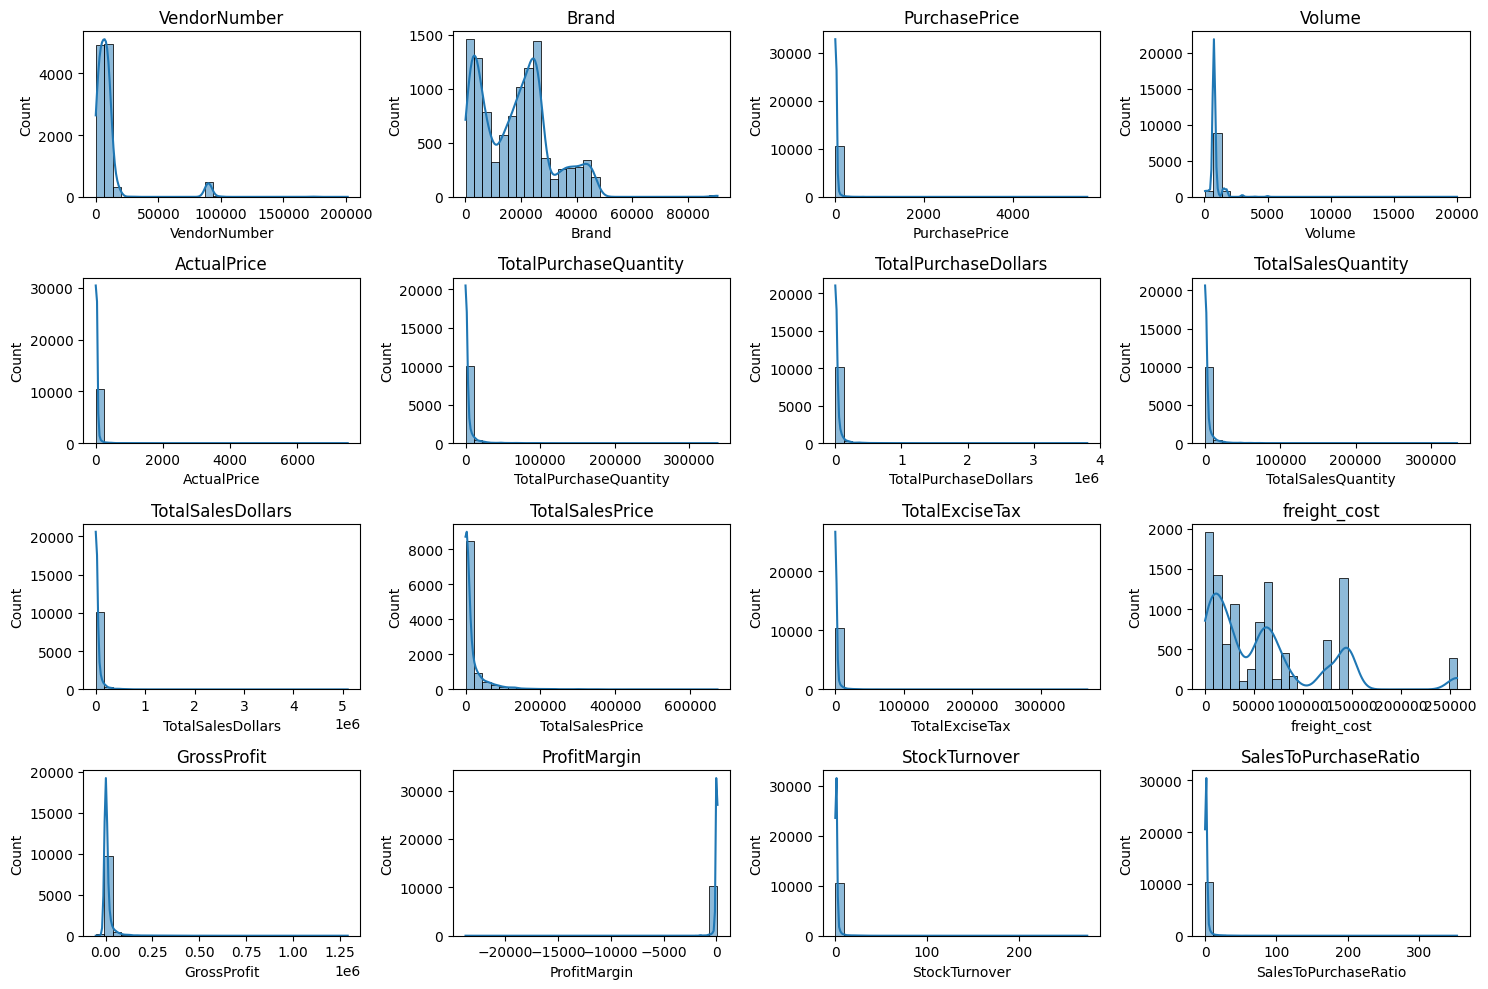

In [7]:
plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()    


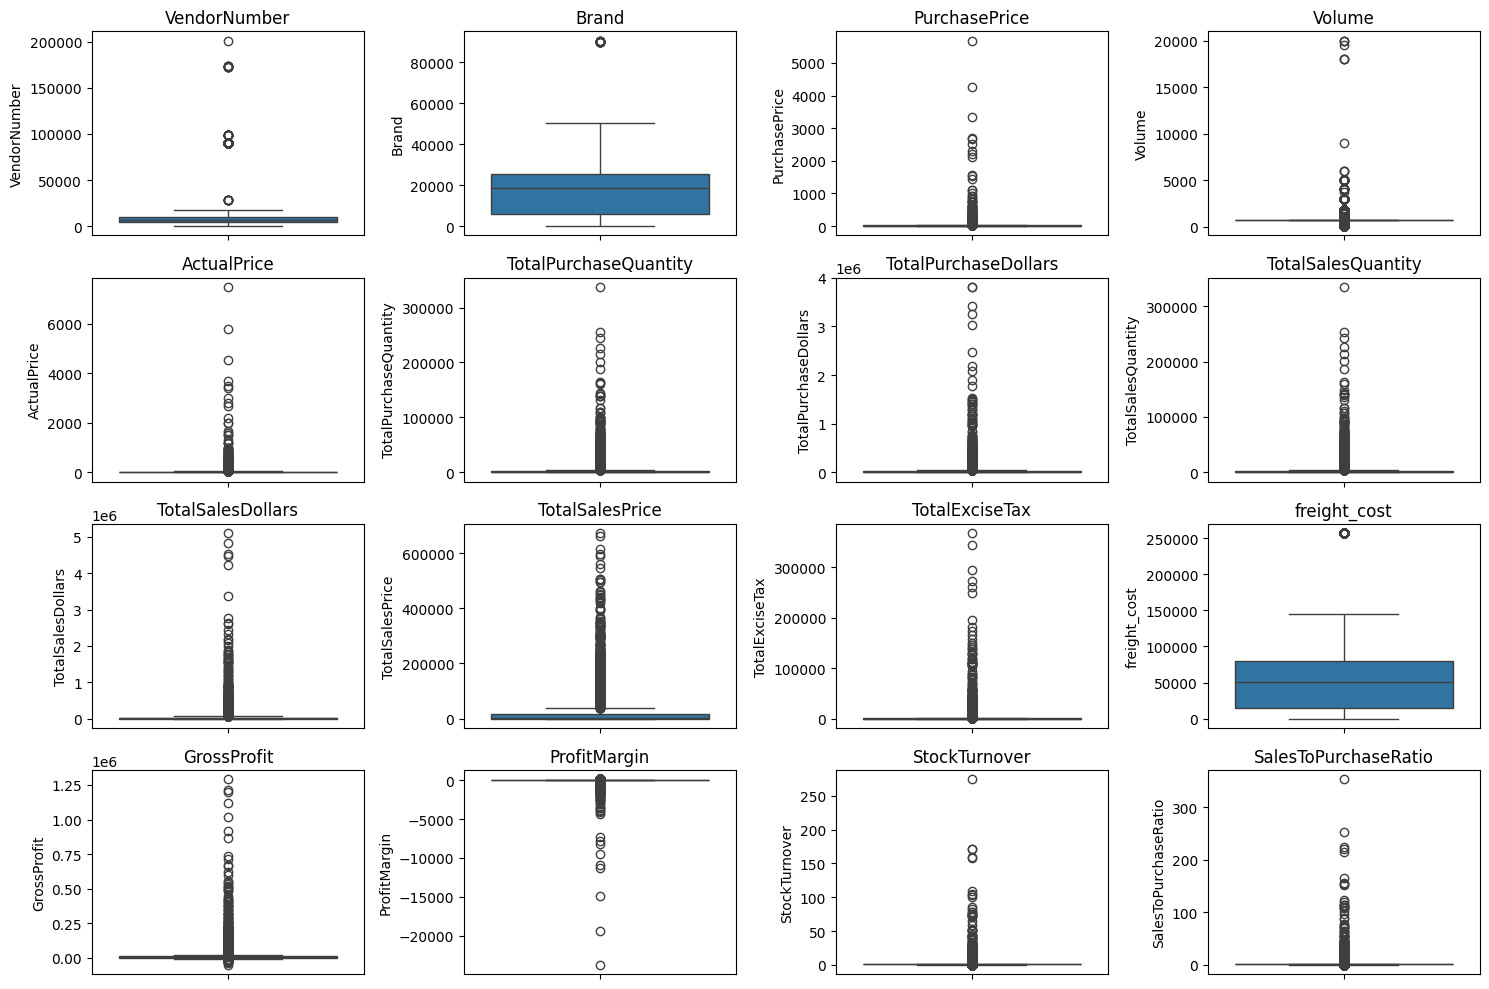

In [ ]:
plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # adjust grid layout as needed
    sns.boxplot(y=df[col])
    
    plt.title(col)
plt.tight_layout()
plt.show()  

In [4]:
#lets filter the data by removing inconsistencies
df= pd.read_sql_query("""SELECT * 
         FROM vendor_sales_summary
         WHERE
         GrossProfit >0 AND
         ProfitMargin>0 AND
         TotalSalesQuantity>0 """,conn)

In [4]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8565.0,10107.041331,17634.685420,2.000000e+00,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8565.0,17614.046468,12945.503736,5.800000e+01,5376.000000,17601.000000,24935.000000,9.063100e+04
PurchasePrice,8565.0,21.779365,81.185007,3.600000e-01,6.660000,10.060000,17.850000,3.352930e+03
Volume,8565.0,864.406480,724.230365,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,8565.0,32.295213,112.414374,4.900000e-01,9.990000,14.990000,25.990000,4.559990e+03
TotalPurchaseQuantity,8565.0,3771.571395,12276.310633,1.000000e+00,42.000000,431.000000,2666.000000,3.376600e+05
TotalPurchaseDollars,8565.0,35883.087602,136715.560071,7.100000e-01,545.490000,5017.200000,26600.610000,3.811252e+06
TotalSalesQuantity,8565.0,3748.547577,12125.055208,1.000000e+00,62.000000,490.000000,2675.000000,3.349390e+05
TotalSalesDollars,8565.0,51536.284564,186061.452634,1.980000e+00,1349.850000,8482.220000,40613.050000,5.101920e+06
TotalSalesPrice,8565.0,22756.625624,49303.003032,9.900000e-01,584.610000,4549.650000,22595.120000,6.728193e+05


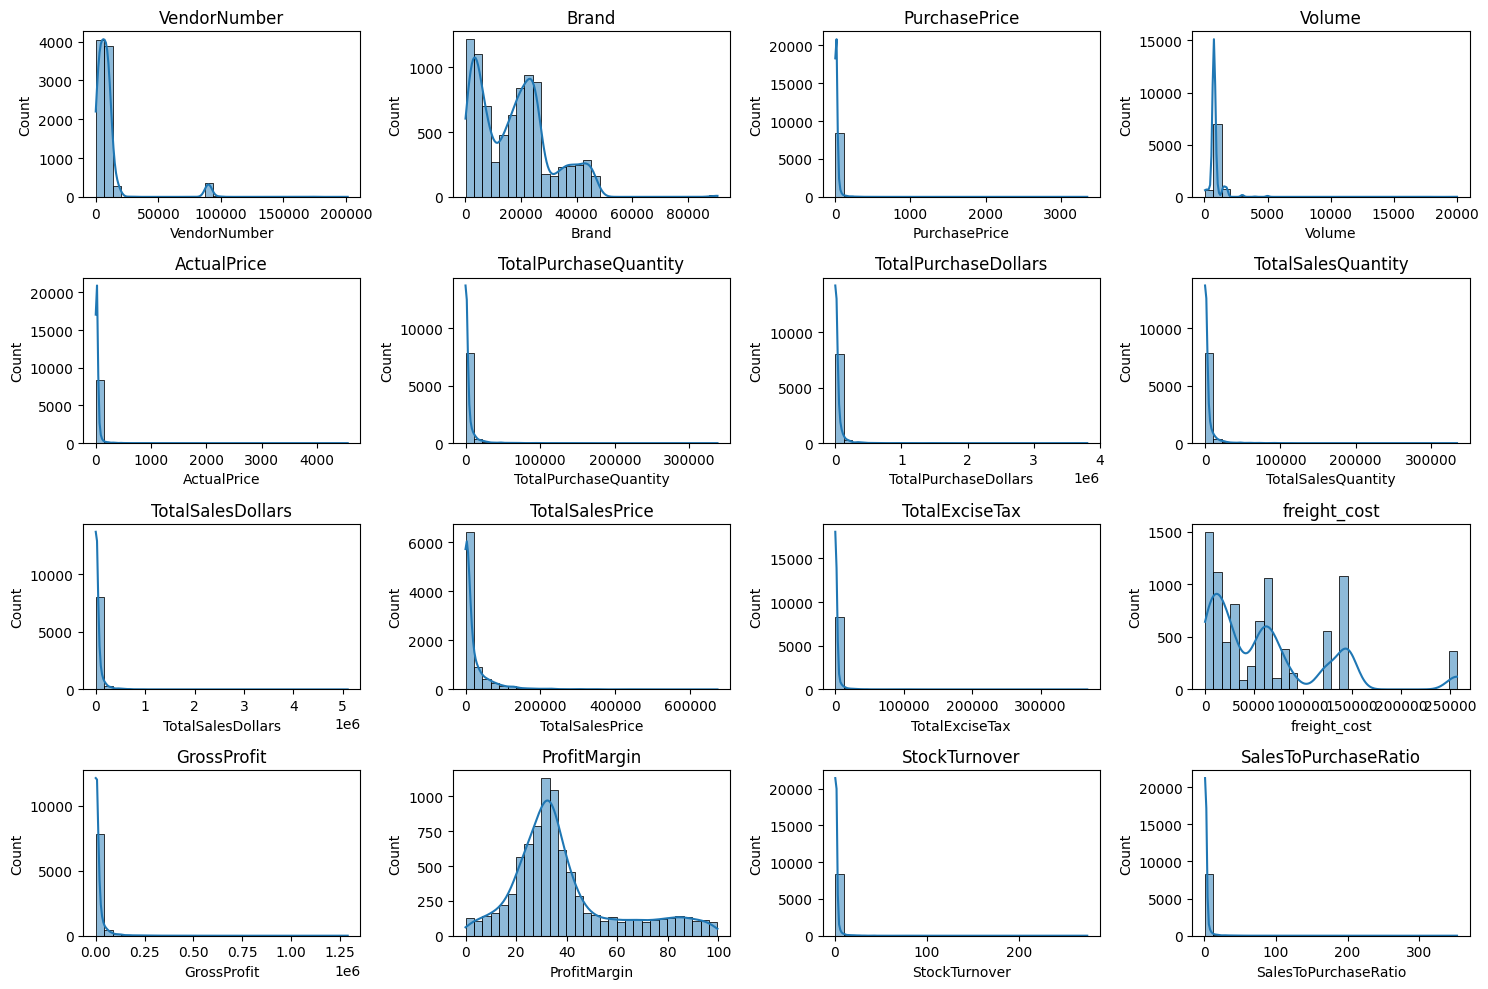

In [12]:
plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show() 

In [5]:
# count plots in categorical colums

categorical_col=["VendorName","Description"]

for i , col in enumerate(categorical_col):
    print(i,col)
    ord=df[col].value_counts().index[:10]
    print(ord)

0 VendorName
Index(['MARTIGNETTI COMPANIES', 'M S WALKER INC', 'ULTRA BEVERAGE COMPANY LLP',
       'PERFECTA WINES', 'E & J GALLO WINERY', 'CONSTELLATION BRANDS INC',
       'DIAGEO NORTH AMERICA INC', 'JIM BEAM BRANDS COMPANY',
       'PINE STATE TRADING CO', 'SOUTHERN WINE & SPIRITS NE'],
      dtype='object', name='VendorName')
1 Description
Index(['Southern Comfort', 'Bacardi Superior Rum', 'Jagermeister Liqueur',
       'Jim Beam', 'Patron Silver Tequila', 'Jack Daniels No 7 Black',
       'Southern Comfort 100 Proof', 'Capt Morgan Spiced Rum',
       'Johnnie Walker Red Label', 'Jose Cuervo Especial'],
      dtype='object', name='Description')


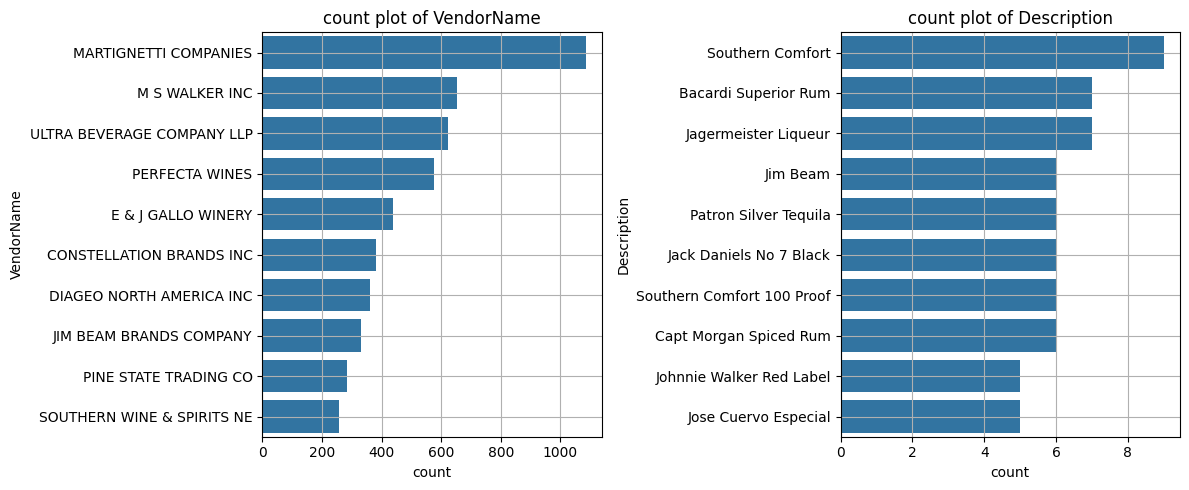

In [21]:
plt.figure(figsize=(12,5))
for i , col in enumerate(categorical_col):
    plt.subplot(1,2 , i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.grid()
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()    

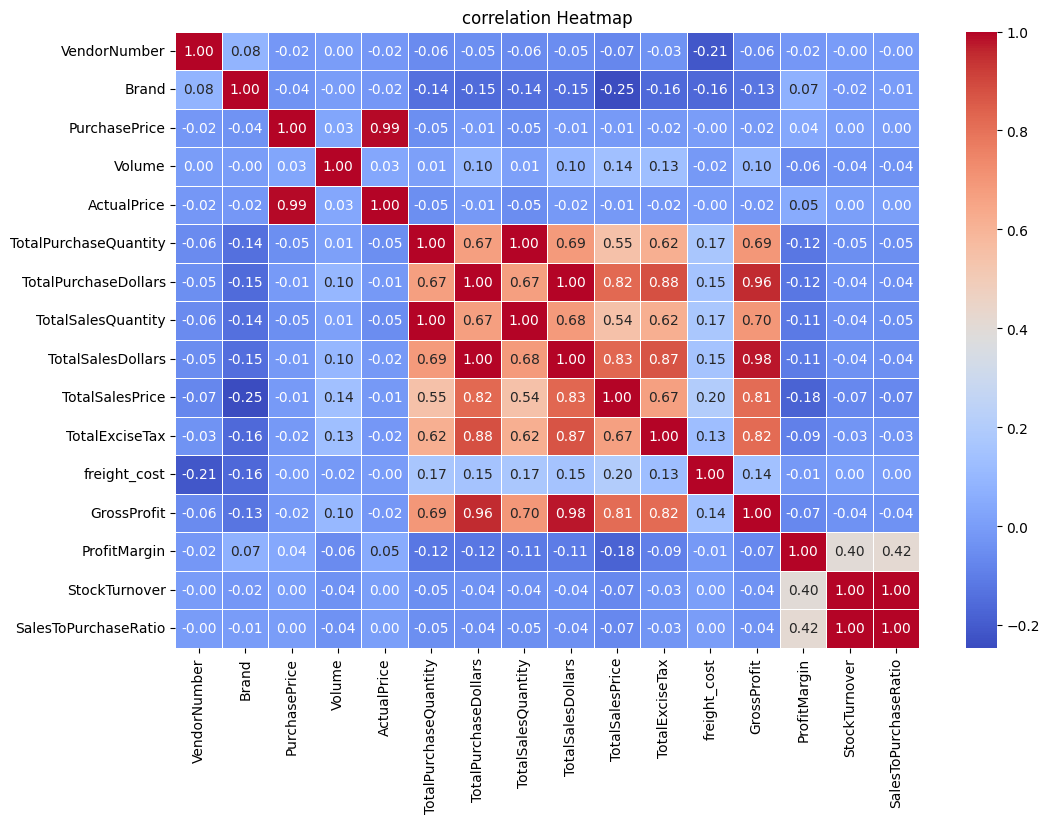

In [7]:
#correlation heatmap

plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("correlation Heatmap")
plt.show()

## DATA ANALYSIS (Research Questions)

##### 1. Identify Brands that needs promotional or pricing adjustment which exhibit lower sales performance but higher profit margin

In [22]:
df.groupby("Description")[["TotalSalesDollars","ProfitMargin"]].mean()

,TotalSalesDollars,ProfitMargin
Description,,
(RI) 1,21519.09,18.060661
.nparalleled Svgn Blanc,1094.63,29.978166
10 Span Cab Svgn CC,2703.89,20.937612
10 Span Chard CC,3325.56,27.806445
10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...
Zorvino Vyds Sangiovese,10579.03,29.525675
Zuccardi Q Malbec,1639.18,23.981503
Zum Rsl,10857.34,32.675038


In [23]:
brand_performace=df.groupby("Description").agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':"mean"}).reset_index()

In [24]:
#threshold values should be set ,,so that we can identify if it less than the

low_sales_threshold=brand_performace["TotalSalesDollars"].quantile(0.15) # means 15% se low hoga jiska sales
high_profitMargin_threshold= brand_performace["ProfitMargin"].quantile(0.85)

In [25]:
print(low_sales_threshold)
print(high_profitMargin_threshold)

560.299
64.97017552750111


In [26]:
#filter brands with low sales but high profit margins
target_brands= brand_performace[
    (brand_performace["TotalSalesDollars"]<=low_sales_threshold) &
    (brand_performace["ProfitMargin"]>=high_profitMargin_threshold)
]
print("Brands with Low Sales but High Profit Margin:")
display(target_brands.sort_values("TotalSalesDollars"))

Brands with Low Sales but High Profit Margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


#### 2.Which Vendors and Brands  demonstrate the highest Sales performance

In [27]:
def formatDollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000 : .2f}M"
    elif value>=1_000:
        return f"{value/1_000 : .2f}K"
    else:
        return str(value)

In [28]:
top_vendor=df.groupby(["VendorName"])["TotalSalesDollars"].sum().nlargest(10)
top_brand=df.groupby(["Description"])["TotalSalesDollars"].sum().nlargest(10)

top_vendor

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [19]:
top_brand

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [29]:
top_brand.apply(lambda x :formatDollars (x))

Description
Jack Daniels No 7 Black     7.96M
Tito's Handmade Vodka       7.40M
Grey Goose Vodka            7.21M
Capt Morgan Spiced Rum      6.36M
Absolut 80 Proof            6.24M
Jameson Irish Whiskey       5.72M
Ketel One Vodka             5.07M
Baileys Irish Cream         4.15M
Kahlua                      3.60M
Tanqueray                   3.46M
Name: TotalSalesDollars, dtype: object

#### 3.Which Vendors contribute the most to total purchase dollar

In [13]:
vendor_performane =df.groupby("VendorName").agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [14]:
vendor_performane["PurchaseContribution%"] = vendor_performane['TotalPurchaseDollars'] / vendor_performane['TotalPurchaseDollars'].sum()

In [19]:
vendor_performane=round(vendor_performane.sort_values("PurchaseContribution%",ascending=False),2)

In [30]:
# display top 10 vendors
top_vendors=vendor_performane.head(10)
top_vendors["TotalSalesDollars"]=top_vendors["TotalSalesDollars"].apply(formatDollars)
top_vendors["TotalPurchaseDollars"]=top_vendors["TotalPurchaseDollars"].apply(formatDollars)
top_vendors["GrossProfit"]=top_vendors["GrossProfit"].apply(formatDollars)

top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03


In [ ]:
top_vendors["PurchaseContribution%"].sum()  # more 50% is contributed by this top 10 vendors

np.float64(0.6600000000000001)